                                       geometry  ele gnis:feature_id leisure  \
element id                                                                     
node    354097497    POINT (-87.68254 41.87258)  181          405519    park   
        354224775    POINT (-87.62075 41.85647)  181         1801922    park   
        2274053293   POINT (-87.74992 41.95311)  NaN             NaN    park   
        3993096535   POINT (-87.67874 41.99584)  NaN             NaN    park   
        10931028405  POINT (-87.62369 41.66748)  184          411560    park   

                                                 name   wikidata  historic  \
element id                                                                   
node    354097497                       Campbell Park  Q34845956       NaN   
        354224775    Prairie Avenue Historic District  Q49545721  district   
        2274053293               Six Corner's Parklet        NaN       NaN   
        3993096535                         McGee 

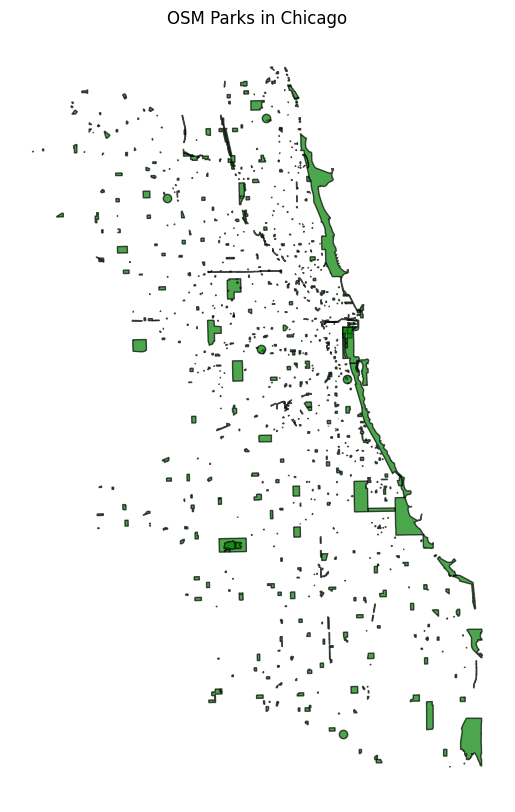

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

# Define the place and the OSM tag for parks
place_name = "Chicago, Illinois, USA"
tags = {"leisure": "park"}

# Retrieve park features from OSM using the correct function name
parks = ox.features_from_place(place_name, tags=tags)

# Inspect the first few rows of the GeoDataFrame (optional)
print(parks.head())

# Plot the parks using Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
parks.plot(ax=ax, color='green', edgecolor='black', alpha=0.7)
ax.set_title("OSM Parks in Chicago")
ax.set_axis_off()  # Hide the axis for a cleaner look
plt.show()

In [7]:
parks = parks.reset_index()

In [3]:
parks

geometry  ele  \
element id                                                                    
node    354097497                           POINT (-87.68254 41.87258)  181   
        354224775                           POINT (-87.62075 41.85647)  181   
        2274053293                          POINT (-87.74992 41.95311)  NaN   
        3993096535                          POINT (-87.67874 41.99584)  NaN   
        10931028405                         POINT (-87.62369 41.66748)  184   
...                                                                ...  ...   
way     1329228816   POLYGON ((-87.67513 41.95371, -87.67513 41.953...  183   
        1329405242   POLYGON ((-87.67427 41.94375, -87.67427 41.943...  NaN   
        1331397546   POLYGON ((-87.65323 41.91603, -87.65317 41.916...  NaN   
        1331397555   POLYGON ((-87.65242 41.91604, -87.65242 41.916...  NaN   
        1344365014   POLYGON ((-87.65408 41.96924, -87.65408 41.969...  NaN   

                    gnis:feature_id leisure                              name  \
element id                                                                      
node    354097497            405519    park                     Campbell Park   
        354224775           1801922    park  Prairie Avenue Historic District   
        2274053293              NaN    park              Six Corner's Parklet   
        3993096535              NaN    park                        McGee Park   
        10931028405          411560    park                     Kiwanis Field   
...                             ...     ...                               ...   
way     1329228816          1826818    park                      Filbert Park   
        1329405242              NaN    park                               NaN   
        1331397546              NaN    park                         Icky Park   
        1331397555              NaN    park                         Icky Park   
        1344365014              NaN    park                               NaN   

                      wikidata  historic type            landuse  \
element id                                                         
node    354097497    Q34845956       NaN  NaN                NaN   
        354224775    Q49545721  district  NaN                NaN   
        2274053293         NaN       NaN  NaN                NaN   
        3993096535         NaN       NaN  NaN                NaN   
        10931028405  Q49511362       NaN  NaN  recreation_ground   
...                        ...       ...  ...                ...   
way     1329228816   Q34875936       NaN  NaN                NaN   
        1329405242         NaN       NaN  NaN                NaN   
        1331397546         NaN       NaN  NaN                NaN   
        1331397555         NaN       NaN  NaN                NaN   
        1344365014         NaN       NaN  NaN                NaN   

                                  operator  ... note construction memorial  \
element id                                  ...                              
node    354097497                      NaN  ...  NaN          NaN      NaN   
        354224775                      NaN  ...  NaN          NaN      NaN   
        2274053293                     NaN  ...  NaN          NaN      NaN   
        3993096535                     NaN  ...  NaN          NaN      NaN   
        10931028405                    NaN  ...  NaN          NaN      NaN   
...                                    ...  ...  ...          ...      ...   
way     1329228816   Chicago Park District  ...  NaN          NaN      NaN   
        1329405242                     NaN  ...  NaN          NaN      NaN   
        1331397546                     NaN  ...  NaN          NaN      NaN   
        1331397555                     NaN  ...  NaN          NaN      NaN   
        1344365014                     NaN  ...  NaN          NaN      NaN   

                    gritting description owner elevation location former_name  \

In [12]:
parks[parks['id'] == 117150850]

,element,id,geometry,ele,gnis:feature_id,leisure,name,wikidata,historic,type,...,note,construction,memorial,gritting,description,owner,elevation,location,former_name,private
183,way,117150850,"POLYGON ((-87.69702 41.96956, -87.69636 41.969...",180,409527,park,Gross Park,Q49496540,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from keplergl import KeplerGl

parks = parks.to_crs(epsg=4326)

# Replace out-of-range float values in numeric columns with None
numeric_cols = parks.select_dtypes(include=['float', 'int']).columns
for col in numeric_cols:
    parks[col] = parks[col].replace([np.inf, -np.inf], None)
    parks[col] = parks[col].where(np.isfinite(parks[col]), None)

# Create a KeplerGl map and add the cleaned data
kepler_map = KeplerGl(height=600)
kepler_map.add_data(data=parks, name="Chicago Parks")
kepler_map.save_to_html(file_name='chicago_parks_kepler.html')
kepler_map

ModuleNotFoundError: No module named 'keplergl'

In [ ]:
kepler_map

KeplerGl(data={'Chicago Parks': {'index': [('node', 354097497), ('node', 354224775), ('node', 2274053293), ('n…

In [ ]:
import osmnx as ox
print("OSMnx version:", ox.__version__)
print("OSMnx file path:", ox.__file__)

OSMnx version: 2.0.1
OSMnx file path: /Users/anfelipecb/Library/CloudStorage/GoogleDrive-afcamachob@uchicago.edu/My Drive/Trials API Google/.venv/lib/python3.10/site-packages/osmnx/__init__.py


In [ ]:
import osmnx as ox
print(dir(ox))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_errors', '_http', '_nominatim', '_osm_xml', '_overpass', '_version', 'add_edge_bearings', 'add_edge_grades', 'add_edge_speeds', 'add_edge_travel_times', 'add_node_elevations_google', 'add_node_elevations_raster', 'basic_stats', 'bearing', 'citation', 'consolidate_intersections', 'convert', 'distance', 'elevation', 'features', 'features_from_address', 'features_from_bbox', 'features_from_place', 'features_from_point', 'features_from_polygon', 'features_from_xml', 'geocode', 'geocode_to_gdf', 'geocoder', 'graph', 'graph_from_address', 'graph_from_bbox', 'graph_from_gdfs', 'graph_from_place', 'graph_from_point', 'graph_from_polygon', 'graph_from_xml', 'graph_to_gdfs', 'io', 'k_shortest_paths', 'load_graphml', 'log', 'nearest_edges', 'nearest_nodes', 'orientation_entropy', 'plot', 'plot_figure_ground', 'plot_footprints', 'plot_graph', 'plot_graph_route', '

In [ ]:
import osmnx as ox
print("OSMnx version:", ox.__version__)
print("OSMnx file path:", ox.__file__)

OSMnx version: 2.0.1
OSMnx file path: /Users/anfelipecb/Library/CloudStorage/GoogleDrive-afcamachob@uchicago.edu/My Drive/Trials API Google/.venv/lib/python3.10/site-packages/osmnx/__init__.py


In [ ]:
print(ox.__version__)

2.0.1


In [ ]:
import sys
sys 